In [85]:
import whisper
import numpy as np

In [138]:
#MODEL_SIZE: str = "tiny"
MODEL_SIZE: str = "medium"
#MODEL_SIZE: str = "large"

model = whisper.load_model(MODEL_SIZE, download_root="~/.whisper")

## Straight to use

In [130]:
#result = model.transcribe("data/traktor.mp3")
result = model.transcribe("data/kill_bill_hattori_hanzo.mp3")

In [ ]:
for k, v in result.items():
    print (f"{k}: {v}")

## Data exploration

In [139]:
import librosa
import matplotlib.pyplot as plt

In [140]:
data, sr = librosa.load("data/kill_bill_hattori_hanzo.mp3", sr=16000)
data = whisper.pad_or_trim(data)

In [141]:
data.shape

(480000,)

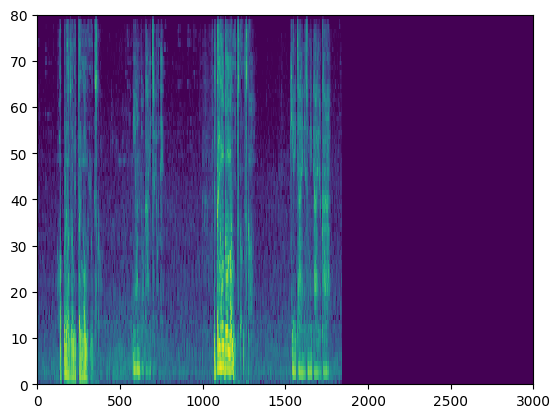

In [142]:
mel = whisper.log_mel_spectrogram(data).to(model.device)
plt.pcolormesh(mel)

In [143]:
_, probs = model.detect_language(mel)

In [146]:
{k: v for k, v in sorted(probs.items(), key=lambda item: item[1], reverse=True)}

{'ja': 0.980498194694519,
 'en': 0.007337060756981373,
 'la': 0.0031066001392900944,
 'zh': 0.0018257744377478957,
 'nn': 0.001218315213918686,
 'ko': 0.001211038208566606,
 'fr': 0.0008233068510890007,
 'de': 0.0005348507547751069,
 'it': 0.00048286389210261405,
 'fi': 0.000398364441934973,
 'es': 0.00036990203079767525,
 'pt': 0.00030831931508146226,
 'hu': 0.00022694400104228407,
 'tr': 0.00021087400091346353,
 'ru': 0.00020838863565586507,
 'pl': 0.0001998393126996234,
 'th': 0.00014642268070019782,
 'ar': 0.00012710291775874794,
 'jw': 0.00012244134268257767,
 'haw': 9.927732753567398e-05,
 'vi': 7.507694681407884e-05,
 'nl': 7.115996413631365e-05,
 'sv': 4.391135007608682e-05,
 'br': 4.287557749194093e-05,
 'mi': 4.031269418192096e-05,
 'el': 3.055425258935429e-05,
 'cy': 2.5357725462527014e-05,
 'hi': 2.4106313503580168e-05,
 'km': 2.1808376914123073e-05,
 'ur': 2.16694734263001e-05,
 'cs': 2.1443953301059082e-05,
 'ms': 1.6251833585556597e-05,
 'mn': 1.2479098586481996e-05,
 'r

In [145]:
options = whisper.DecodingOptions(fp16=False)
result = whisper.decode(model, mel, options)

# print the recognized text
print(result.text)

あっとれはんぞに一体何の用ですか日本刀が必要で一体日本刀は何に使うんですか切りたえネズミがいるから


## Translate

In [147]:
# Run this on US VPN
import google.generativeai as genai
import os

os.environ["API_KEY"] = "AIza..."

genai.configure(
    api_key=os.environ['API_KEY'])
model = genai.GenerativeModel(
    model_name='gemini-pro')

In [148]:
foreign_text = "ハットリハンゾに一体何の用ですか?日本刀が必要で一体日本刀を何に使うんですか?キリタエネズミがいるから"
input_message = f"Could you please translate the following text: `{foreign_text}` into English?"

gemini_response = model.generate_content(input_message)
gemini_message = gemini_response.text
print(gemini_message)

What on earth would you need Hattori Hanzo for? What would you need a katana for? Ninjas, perhaps?
